In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import sys

# Definindo as equações diferenciais do modelo de McSharry
def ecg_model(y, t, a0, f0, A, B, theta):
    x, y, z = y
    print(y)
    sys.exit()
    dxdt = z - a0 * x + 2 * np.pi * f0 * y
    dydt = -a0 * y - 2 * np.pi * f0 * x
    dzdt = -np.sum(A * (theta - np.arctan2(y, x)) * np.exp(-((theta - np.arctan2(y, x)) / B) ** 2)) - (z - x)
    return [dxdt, dydt, dzdt]

# Parâmetros do modelo
a0 = 1.0
f0 = 1.0
A = np.array([1.2, -5.0, 30.0])
B = np.array([0.25, 0.1, 0.1])
theta = np.array([-np.pi / 3, np.pi / 4, np.pi / 2])

# Condições iniciais
y0 = [0.0, 0.0, 0.0]

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Resolvendo as equações diferenciais
sol = odeint(ecg_model, y0, t, args=(a0, f0, A, B, theta))

# Obtendo o sinal de ECG (considerando a componente 'x')
ecg_signal = sol[:, 0]

# Plotando o sinal de ECG
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


0.0


SystemExit: 

/home/diogo/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fftpack import ifft

# Definindo as equações diferenciais do modelo de McSharry
def ecg_model(state, t, A, B, theta_vector, omega):
    x, y, z = state
    alpha = 1 - np.sqrt(x ** 2 + y ** 2) 

    dxdt = z - alpha * x - omega[int(t)] * y
    dydt = alpha * y + omega[int(t)] * x
    
    for i in range(len(theta_vector)):
        sum = (A[i] * (theta - theta_vector[i])) * np.exp(-((theta - theta_vector[i]) / (2 * B[i])) ** 2) - (z - x)
        
    dzdt = -sum
    return [dxdt, dydt, dzdt]

# Parâmetros do modelo
A = np.array([1.2, -5.0, 30.0, -7.5, 0.75])
B = np.array([0.25, 0.1, 0.1, 0.1, 0.4])
theta_vector = np.array([-np.pi / 3, -np.pi / 12,0,np.pi/12/ np.pi / 2])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fftpack import ifft

# Definindo as equações diferenciais do modelo de McSharry
def ecg_model(state, t, A, B, theta_vector, omega):
    x, y, z = state
    alpha = 1 - np.sqrt(x ** 2 + y ** 2) 

    dxdt = z - alpha * x - omega[int(t)] * y
    dydt = alpha * y + omega[int(t)] * x
    
    for i in range(len(theta_vector)):
        sum = (A[i] * (theta - theta_vector[i])) * np.exp(-((theta - theta_vector[i]) / (2 * B[i])) ** 2) - (z - x)
        
    dzdt = -sum
    return [dxdt, dydt, dzdt]

# Parâmetros do modelo
A = np.array([1.2, -5.0, 30.0, -7.5, 0.75])
B = np.array([0.25, 0.1, 0.1, 0.1, 0.4])
theta_vector = np.array([-np.pi / 3, -np.pi / 12,0,np.pi/12/ np.pi / 2])

# Parâmetros do espectro de potência
LF_mean = 0.1
LF_std = 0.01
HF_mean = 0.25
HF_std = 0.01
LF_power = 1.0
HF_power = 0.5
total_area = LF_power + HF_power
LF_HF_ratio = LF_power / HF_power

# Frequências
N = 1000
frequencies = np.linspace(0, 0.5, N)

# Espectro de potência bimodal
LF_gaussian = LF_power * np.exp(-0.5 * ((frequencies - LF_mean) / LF_std) ** 2)
HF_gaussian = HF_power * np.exp(-0.5 * ((frequencies - HF_mean) / HF_std) ** 2)
power_spectrum = LF_gaussian + HF_gaussian

# Gerar a série temporal dos intervalos RR usando a IFT
random_phases = np.random.uniform(0, 2 * np.pi, N)
complex_spectrum = np.sqrt(power_spectrum) * np.exp(1j * random_phases)
rr_intervals = np.real(ifft(complex_spectrum))

# Ajustar a média e o desvio padrão dos intervalos RR
rr_intervals = (rr_intervals - np.mean(rr_intervals)) / np.std(rr_intervals)
desired_mean = 0.8
desired_std = 0.1
rr_intervals = rr_intervals * desired_std + desired_mean

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
state = [0.0, 0.0, 0.0]

# Velocidade angular dependente do tempo
omega = 2 * np.pi / rr_intervals

# Resolvendo as equações diferenciais
sol = odeint(ecg_model, state, t, args=( A, B, theta, omega))

# Obtendo o sinal de ECG (considerando a componente 'x')
ecg_signal = sol[:, 0]

# Plotando o sinal de ECG
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry com Efeitos de RSA e Ondas Mayer')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotando os intervalos RR
plt.figure(figsize=(12, 6))
plt.plot(t, rr_intervals)
plt.title('Intervalos RR com Espectro de Potência Bimodal')
plt.xlabel('Tempo (s)')
plt.ylabel('Intervalo RR (s)')
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.fftpack import ifft

# Definindo as equações diferenciais do modelo de McSharry
def ecg_model(state, t, A, B, theta_vector, omega):
    x, y, z = state
    alpha = 1 - np.sqrt(x ** 2 + y ** 2)

    dxdt = z - alpha * x - omega[int(t)] * y
    dydt = alpha * y + omega[int(t)] * x
    
    sum_term = 0.0
    for i in range(len(theta_vector)):
        sum_term += A[i] * (theta - theta_vector[i]) * np.exp(-((theta - theta_vector[i]) / (2 * B[i])) ** 2) - (z - x)
        
    dzdt = -sum_term
    return [dxdt, dydt, dzdt]

# Parâmetros do modelo
A = np.array([1.2, -5.0, 30.0, -7.5, 0.75])
B = np.array([0.25, 0.1, 0.1, 0.1, 0.4])
theta_vector = np.array([-np.pi / 3, -np.pi / 12, 0, np.pi / 12])

# Frequências
N = 1000
frequencies = np.linspace(0, 0.5, N)

# Espectro de potência bimodal
LF_mean = 0.1
LF_std = 0.01
HF_mean = 0.25
HF_std = 0.01
LF_power = 1.0
HF_power = 0.5
power_spectrum = (LF_power * np.exp(-0.5 * ((frequencies - LF_mean) / LF_std) ** 2) +
                  HF_power * np.exp(-0.5 * ((frequencies - HF_mean) / HF_std) ** 2))

# Gerar a série temporal dos intervalos RR usando a IFT
random_phases = np.random.uniform(0, 2 * np.pi, N)
complex_spectrum = np.sqrt(power_spectrum) * np.exp(1j * random_phases)
rr_intervals = np.real(ifft(complex_spectrum))

# Ajustar a média e o desvio padrão dos intervalos RR
rr_intervals = (rr_intervals - np.mean(rr_intervals)) / np.std(rr_intervals)
desired_mean = 0.8
desired_std = 0.1
rr_intervals = rr_intervals * desired_std + desired_mean

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
state = [0.0, 0.0, 0.0]

# Velocidade angular dependente do tempo
omega = 2 * np.pi / rr_intervals

# Resolvendo as equações diferenciais
sol = odeint(ecg_model, state, t, args=(A, B, theta_vector, omega))

# Obtendo o sinal de ECG (considerando a componente 'x')
ecg_signal = sol[:, 0]

# Plotando o sinal de ECG
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry com Efeitos de RSA e Ondas Mayer')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotando os intervalos RR
plt.figure(figsize=(12, 6))
plt.plot(t, rr_intervals)
plt.title('Intervalos RR com Espectro de Potência Bimodal')
plt.xlabel('Tempo (s)')
plt.ylabel('Intervalo RR (s)')
plt.grid(True)
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

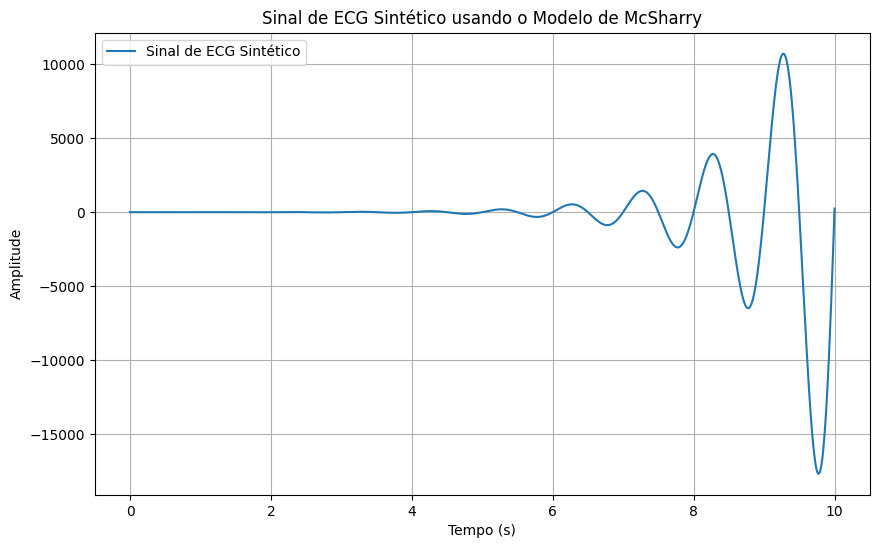

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
alpha = 1.0
omega = 2 * np.pi / 1.0
beta = 0.1
z0 = 0.15
A = [1.2, -5.0, 30.0]
theta = [0.0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi]
sigma = [0.1, 0.1, 0.1]

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    dxdt = alpha * x - omega * y
    dydt = omega * x + alpha * y
    dzdt = beta * (z - z0)
    
    # Adicionar o componente de onda
    for j in range(len(A)):
        delta_theta = (t - theta[j]) % (2 * np.pi)
        dzdt += A[j] * np.exp(-delta_theta ** 2 / (2 * sigma[j] ** 2))
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[1], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()


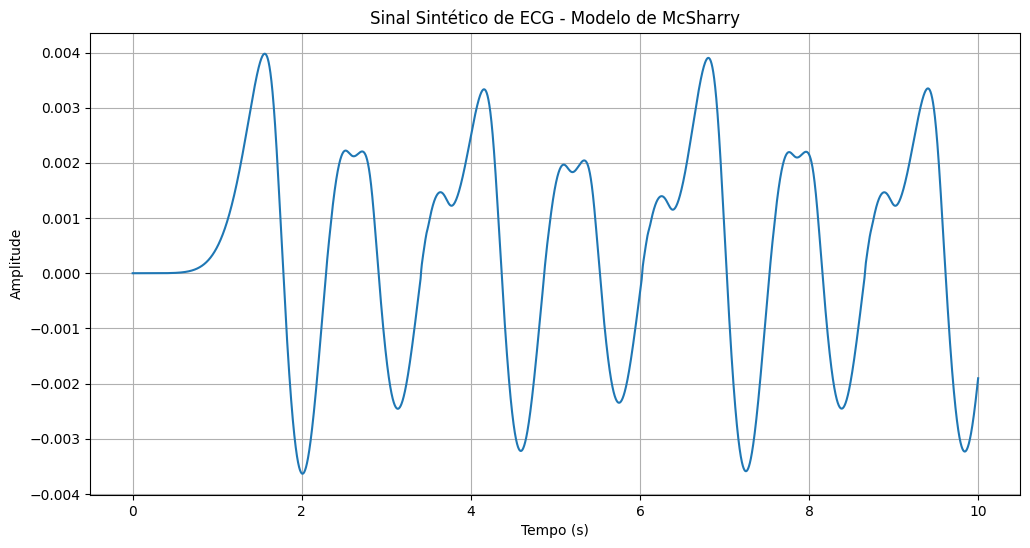

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definindo as equações diferenciais do modelo de McSharry
def ecg_model(y, t, a0, f0, A, B, theta):
    x, y, z = y
    dxdt = z - a0 * x + 2 * np.pi * f0 * y
    dydt = -a0 * y - 2 * np.pi * f0 * x
    dzdt = -np.sum(A * (theta - np.arctan2(y, x)) * np.exp(-((theta - np.arctan2(y, x)) / B) ** 2)) - (z - x)
    return [dxdt, dydt, dzdt]

# Parâmetros do modelo
a0 = 1.0
f0 = 1.0
A = np.array([1.2, -5.0, 30.0])
B = np.array([0.25, 0.1, 0.1])
theta = np.array([-np.pi / 3, np.pi / 4, np.pi / 2])

# Condições iniciais
y0 = [0.0, 0.0, 0.0]

# Tempo de simulação
t = np.linspace(0, 10, 10000)

# Resolvendo as equações diferenciais
sol = odeint(ecg_model, y0, t, args=(a0, f0, A, B, theta))

# Obtendo o sinal de ECG (considerando a componente 'x')
ecg_signal = sol[:, 0]

# Plotando o sinal de ECG
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
omega = 2 * np.pi
beta = 0.2
z0 = 0.0
A = np.array([1.2, -5.0, 30.0])  
theta = np.array([0.0, np.pi / 2, np.pi])
sigma = np.array([0.1, 0.1, 0.1])


# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    alpha = 1 - np.sqrt(x ** 2 + y ** 2)

    dxdt = alpha * x - beta + y
    dydt = -x / alpha + beta * z
    delta_theta = (t - theta) % (2 * np.pi)
    dzdt = -np.sum(A * np.exp(-delta_theta**2 / (2 * sigma**2)) - (z - z0))
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [0.0, 0.0, 0.1]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Extraindo o componente z que representa o sinal de ECG
ecg_signal = sol.y[2]

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 4))
plt.plot(sol.t, ecg_signal, color='red')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

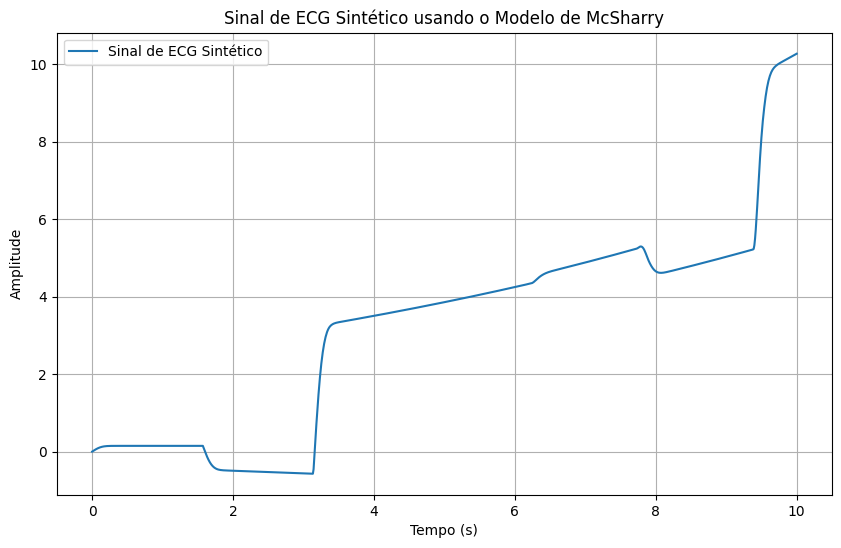

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
alpha = 1.0
omega = 2 * np.pi / 1.0
beta = 0.1
z0 = 0.15
A = [1.2, -5.0, 30.0]
theta = [0.0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi]
sigma = [0.1, 0.1, 0.1]

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    dxdt = alpha * x - omega * y
    dydt = omega * x + alpha * y
    dzdt = beta * (z - z0)
    
    # Adicionar o componente de onda
    for j in range(len(A)):
        delta_theta = (t - theta[j]) % (2 * np.pi)
        dzdt += A[j] * np.exp(-delta_theta ** 2 / (2 * sigma[j] ** 2))
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()


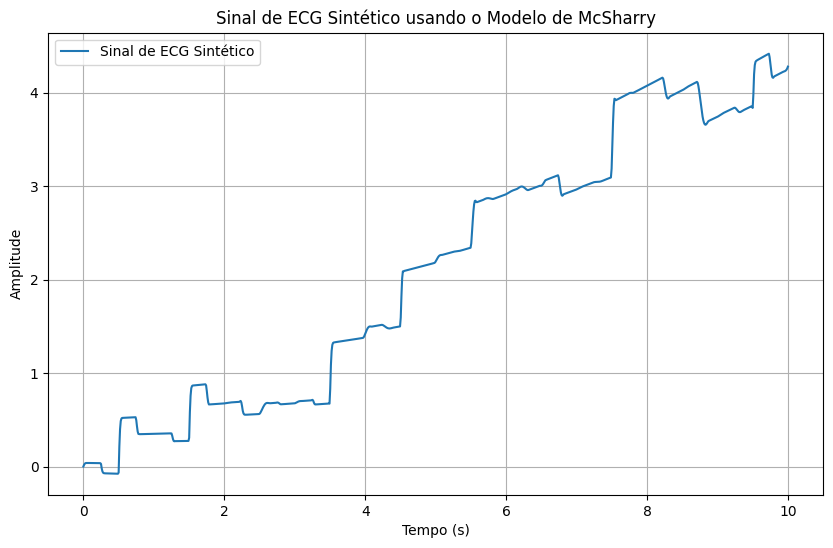

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
alpha = 1.0
omega = 2 * np.pi / 1.0  # Frequência angular de 1 Hz
beta = 0.1
z0 = 0.15
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta = [0.0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi]
sigma = [0.1, 0.1, 0.1, 0.1, 0.1]

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    dxdt = alpha * x - omega * y
    dydt = omega * x + alpha * y
    dzdt = beta * (z - z0)
    
    # Adicionar o componente de onda
    for j in range(len(A)):
        delta_theta = (omega * t - theta[j]) % (2 * np.pi)
        dzdt += A[j] * np.exp(-delta_theta ** 2 / (2 * sigma[j] ** 2))
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.fftpack import ifft

# Definindo as equações diferenciais do modelo de McSharry
def ecg_model(state, t, A, B, theta_vector, omega):
    x, y, z = state
    alpha = 1 - np.sqrt(x ** 2 + y ** 2)

    dxdt = z - alpha * x - omega[int(t)] * y
    dydt = alpha * y + omega[int(t)] * x
    
    sum_term = 0.0
    for i in range(len(theta_vector)):
        sum_term += A[i] * (theta - theta_vector[i]) * np.exp(-((theta - theta_vector[i]) / (2 * B[i])) ** 2) - (z - x)
        
    dzdt = -sum_term
    return [dxdt, dydt, dzdt]

# Parâmetros do modelo
A = np.array([1.2, -5.0, 30.0, -7.5, 0.75])
B = np.array([0.25, 0.1, 0.1, 0.1, 0.4])
theta_vector = np.array([-np.pi / 3, -np.pi / 12, 0, np.pi / 12])

# Frequências
N = 1000
frequencies = np.linspace(0, 0.5, N)

# Espectro de potência bimodal
LF_mean = 0.1
LF_std = 0.01
HF_mean = 0.25
HF_std = 0.01
LF_power = 1.0
HF_power = 0.5
power_spectrum = (LF_power * np.exp(-0.5 * ((frequencies - LF_mean) / LF_std) ** 2) +
                  HF_power * np.exp(-0.5 * ((frequencies - HF_mean) / HF_std) ** 2))

# Gerar a série temporal dos intervalos RR usando a IFT
random_phases = np.random.uniform(0, 2 * np.pi, N)
complex_spectrum = np.sqrt(power_spectrum) * np.exp(1j * random_phases)
rr_intervals = np.real(ifft(complex_spectrum))

# Ajustar a média e o desvio padrão dos intervalos RR
rr_intervals = (rr_intervals - np.mean(rr_intervals)) / np.std(rr_intervals)
desired_mean = 0.8
desired_std = 0.1
rr_intervals = rr_intervals * desired_std + desired_mean

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Condições iniciais
state = [0.0, 0.0, 0.0]

# Velocidade angular dependente do tempo
omega = 2 * np.pi / rr_intervals

# Resolvendo as equações diferenciais
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Obtendo o sinal de ECG (considerando a componente 'x')
ecg_signal = sol[:, 0]

# Plotando o sinal de ECG
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal)
plt.title('Sinal Sintético de ECG - Modelo de McSharry com Efeitos de RSA e Ondas Mayer')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Plotando os intervalos RR
plt.figure(figsize=(12, 6))
plt.plot(t, rr_intervals)
plt.title('Intervalos RR com Espectro de Potência Bimodal')
plt.xlabel('Tempo (s)')
plt.ylabel('Intervalo RR (s)')
plt.grid(True)
plt.show()

ValueError: operands could not be broadcast together with shapes (5,) (3,) 

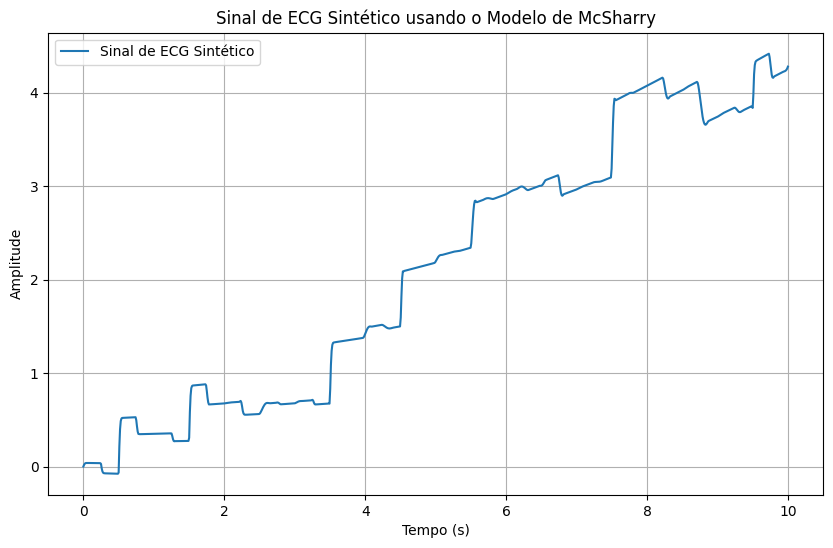

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
alpha = 1.0
omega = 2 * np.pi / 1.0  # Frequência angular de 1 Hz
beta = 0.1
z0 = 0.15
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta = [0.0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi]
sigma = [0.1, 0.1, 0.1, 0.1, 0.1]

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    dxdt = alpha * x - omega * y
    dydt = omega * x + alpha * y
    dzdt = beta * (z - z0)
    
    # Adicionar o componente de onda
    for j in range(len(A)):
        delta_theta = (omega * t - theta[j]) % (2 * np.pi)
        dzdt += A[j] * np.exp(-delta_theta ** 2 / (2 * sigma[j] ** 2))
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()


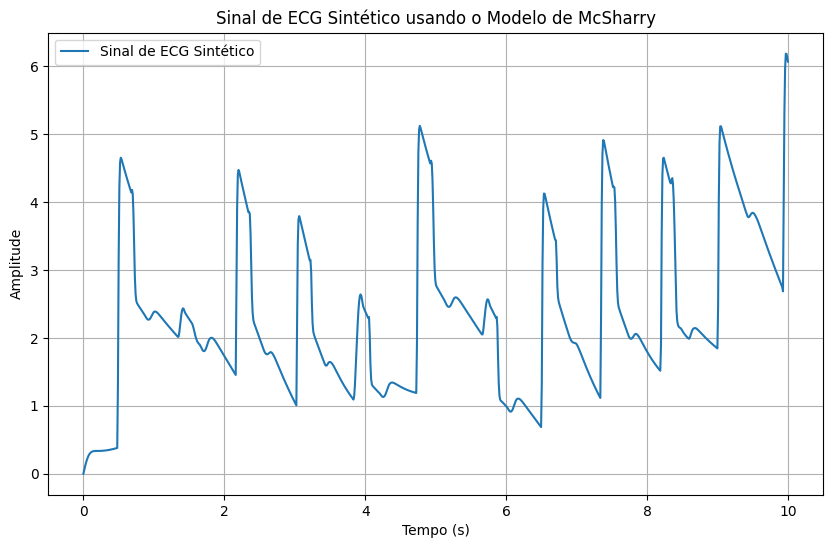

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import periodogram

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25

# Gerar o espectro de potência e T(t)
fs = 1000  # taxa de amostragem
t = np.arange(0, 10, 1/fs)
f = np.linspace(0, fs/2, len(t)//2 + 1)
power_spectrum = np.exp(-((f - 0.2)**2) / (2 * 0.05**2)) + np.exp(-((f - 0.4)**2) / (2 * 0.05**2))
T_t = np.fft.irfft(power_spectrum)
T_t = (T_t - np.min(T_t)) / (np.max(T_t) - np.min(T_t)) * 0.2 + 0.8  # normalizar e ajustar a escala

# Interpolação de T(t) para ser usada na função mcsharry
T_t_interp = np.interp(t, np.linspace(0, 10, len(T_t)), T_t)

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    T = np.interp(t, np.linspace(0, 10, len(T_t)), T_t)  # Interpolar T(t) no tempo atual
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))**2 / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_32274/767920168.py:16: RuntimeWarning: invalid value encountered in sqrt
  alpha = 1 - np.sqrt(x*2 + y*2)


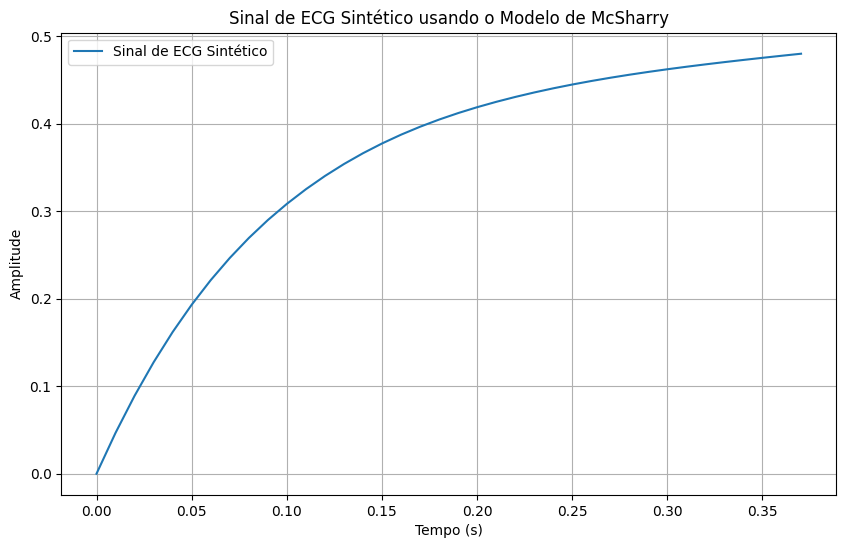

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [-np.pi/3, -np.pi/12, np.pi, 3 * np.pi / 2, 2 * np.pi]
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x*2 + y*2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j]) % (2 * np.pi))*2 / (2 * b_i[j]*2)) for j in range(len(A))) - (z - z0)
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()

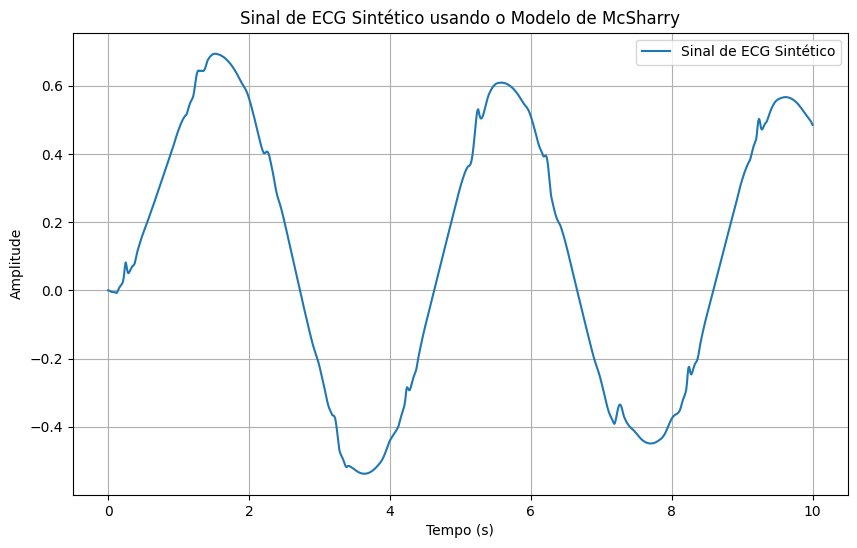

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir os parâmetros do modelo de McSharry
A = [1.2, -5.0, 30.0, -7.5, 0.75]
theta_i = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi] 
b_i = [0.25, 0.1, 0.1, 0.1, 0.4]
f_2 = 0.25
T = 1.0  # Período constante

# Definir a função que representa as EDOs
def mcsharry(t, state):
    x, y, z = state
    omega = 2 * np.pi / T
    alpha = 1 - np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    z0 = np.sin(2 * np.pi * f_2 * t)
    
    dzdt = -sum(A[j] * (theta - theta_i[j]) * np.exp(-((theta - theta_i[j])**2) / (2 * b_i[j]**2)) for j in range(len(A))) - (z - z0)
    dxdt = alpha * x - omega * y
    dydt = alpha * y + omega * x
    
    return [dxdt, dydt, dzdt]

# Condições iniciais
initial_state = [1.0, 0.0, 0.0]

# Intervalo de tempo para simulação
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Resolver as EDOs usando solve_ivp com método RK45
sol = solve_ivp(mcsharry, t_span, initial_state, t_eval=t_eval, method='RK45')

# Plotar o sinal de ECG sintético
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Sinal de ECG Sintético')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal de ECG Sintético usando o Modelo de McSharry')
plt.legend()
plt.grid(True)
plt.show()
